In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi 

plt.rcParams["figure.figsize"] = (16,8)

In [32]:
raw_scores = {'raw_scores_col1':'579 877 758 867 488 586 577 875 679 668 768 557 469 866 587 658 775 887 798 774 667 667 655 596 888 797 666 586 757 769 677 679 878',
'raw_scores_col2':'699 166 886 565 478 997 998 338 781 998 696 898 897 989 678 678 179 075 788 586 889 767 984 689 686 779 567 697 869 967 478 65x 857',
'raw_scores_col3':'757 464 576 847 97x 470 856 766 496 839 769 79x 739 678 876 777 x47 784 846 587 765 964 577 655 877 984 976 788 884 888 2x5 756 468',
'raw_scores_col4':'987 988 885 678 358 777 578 557 284 536 885 587 674 987 677 749 978 687 987 867 676 845 665 566 378 757 086 886 337 839 x68 966 984'}

In [33]:
scores = []
for key, i in zip(raw_scores.keys(), raw_scores.values()):
    i = list(i)
    for j in i:
        if j.isdigit()==True:
            scores.append(int(j))
        elif j=='x':
            j = '10'
            scores.append(int(j))            
scores = np.asarray(scores).reshape(-1, 3)

In [34]:
scores_df = pd.DataFrame(scores, columns=['throw_1','throw_2','throw_3'])

In [7]:
#Таблица с очками. Заносятся очки за 3 броска 

scores_df

,throw_1,throw_2,throw_3
0,5,7,9
1,8,7,7
2,7,5,8
3,8,6,7
4,4,8,8
...,...,...,...
127,3,3,7
128,8,3,9
129,10,6,8
130,9,6,6


In [8]:
throws = scores_df.iloc[:, 0:3]

In [9]:
scores_df['sum'] = scores_df.sum(axis=1)
scores_df['mean'] = throws.mean(axis=1).round(2)

In [10]:
scores_df.head()

,throw_1,throw_2,throw_3,sum,mean
0,5,7,9,21,7.00
1,8,7,7,22,7.33
2,7,5,8,20,6.67
3,8,6,7,21,7.00
4,4,8,8,20,6.67


In [11]:
mean_total = scores_df['mean'].mean().round(2)
median_total = scores_df['mean'].median().round(2)
std = scores_df['mean'].std().round(2)
min_score = throws.min().min()
max_score = throws.max().max()

In [12]:
index = ['mean', 'median', 'std', 'min', 'max']
scores_stat = pd.DataFrame({'col_1':[mean_total, median_total, std, min_score, max_score]}, index=index)
scores_stat

,col_1
mean,6.69
median,6.67
std,1.01
min,0.00
max,10.00


In [13]:
print(f'Среднее число очков в 1 броске: {scores_df["throw_1"].mean().round(2)}')
print(f'Среднее число очков в 2 броске: {scores_df["throw_2"].mean().round(2)}')
print(f'Среднее число очков в 3 броске: {scores_df["throw_3"].mean().round(2)}')

Среднее число очков в 1 броске: 6.47
Среднее число очков в 2 броске: 6.77
Среднее число очков в 3 броске: 6.85


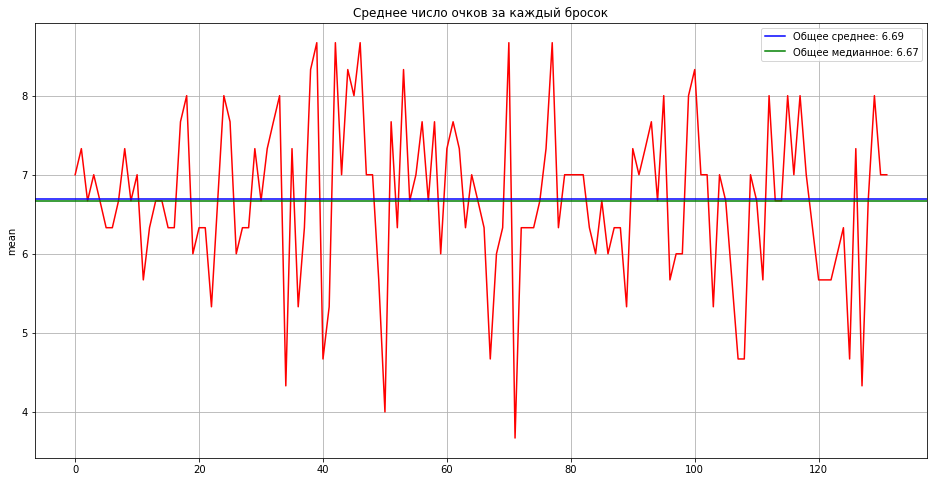

In [14]:
sns.lineplot(x=np.arange(len(scores_df['mean'])), y=scores_df['mean'], color='r')
plt.grid(True)
plt.axhline(mean_total, color='b', label=f'Общее среднее: {mean_total}')
plt.axhline(median_total, color='g', label=f'Общее медианное: {median_total}')
plt.title('Среднее число очков за каждый бросок')
plt.legend()
plt.show()

In [15]:
unique_scores, scores_count = np.unique(scores, return_counts=True)
print(unique_scores)
print(scores_count)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 3  3  2 10 23 44 75 95 88 47  6]


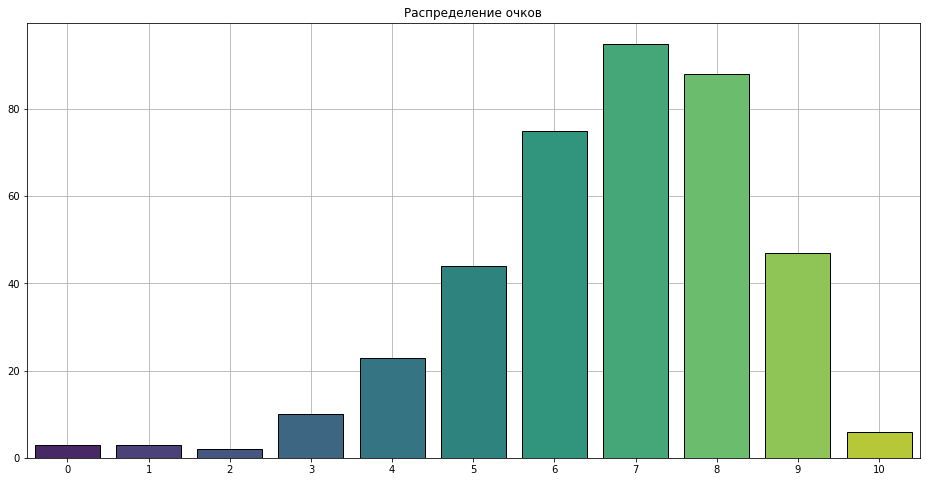

In [16]:
sns.barplot(x=unique_scores, y=scores_count, palette='viridis', zorder=2, ec='k')
plt.grid(True)
plt.title('Распределение очков')
plt.show()

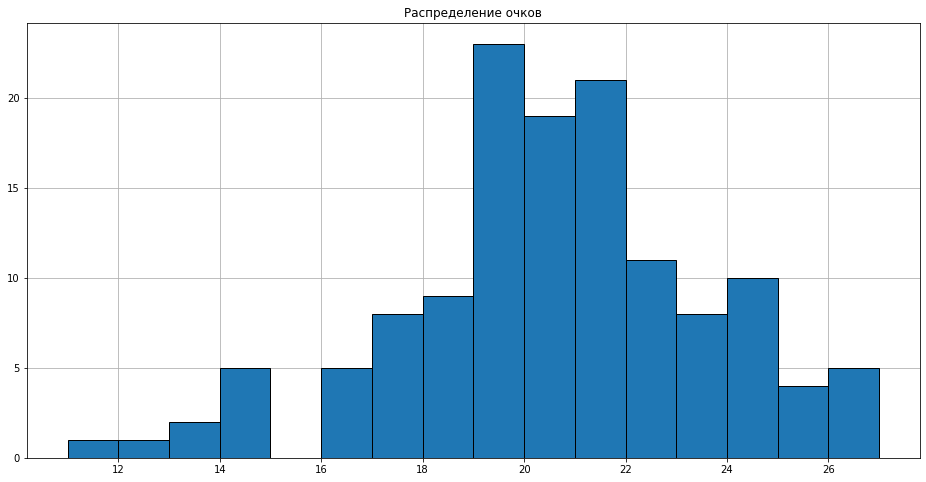

In [30]:
plt.hist(scores_df['sum'], ec='k', bins=range(scores_df['sum'].min(), scores_df['sum'].max()+2), zorder=2)
plt.grid(True)
plt.title('Распределение очков')
plt.show()

In [18]:
#Разница между очками по сравнению с предыдущими бросками

score_diff = pd.DataFrame(np.diff(throws), columns=['diff_1','diff_2'])

In [19]:
throws.head()

,throw_1,throw_2,throw_3
0,5,7,9
1,8,7,7
2,7,5,8
3,8,6,7
4,4,8,8


In [20]:
def is_more_six(x):
    if (x[0]>6 and x[1]>6 and x[2]>6):
        return 1
    else:
        return 0

In [21]:
scores_df['is_more_six'] = throws.apply(is_more_six, axis=1)

In [22]:
scores_df = pd.concat([scores_df, score_diff], axis=1)

In [23]:
#Группируем данные по частям

sets_scores_data = scores_df.groupby(np.arange(len(scores_df.index))//(len(scores_df.index)/4), axis=0).mean().round(2)
sets_scores_data

,throw_1,throw_2,throw_3,sum,mean,is_more_six,diff_1,diff_2
0.0,6.33,6.79,7.12,20.24,6.75,0.18,0.45,0.33
1.0,6.24,7.33,7.24,20.82,6.94,0.27,1.09,-0.09
2.0,6.82,6.45,6.39,19.67,6.56,0.18,-0.36,-0.06
3.0,6.48,6.48,6.64,19.61,6.54,0.18,0.00,0.15


In [24]:
sets_scores_data.iloc[3][:3]

throw_1    6.48
throw_2    6.48
throw_3    6.64
Name: 3.0, dtype: float64

In [25]:
np.arange(len(sets_scores_data))

array([0, 1, 2, 3])

In [26]:
sets_scores_data.iloc[0][:3]

throw_1    6.33
throw_2    6.79
throw_3    7.12
Name: 0.0, dtype: float64

In [27]:
sets_scores_data['mean']

0.0    6.75
1.0    6.94
2.0    6.56
3.0    6.54
Name: mean, dtype: float64

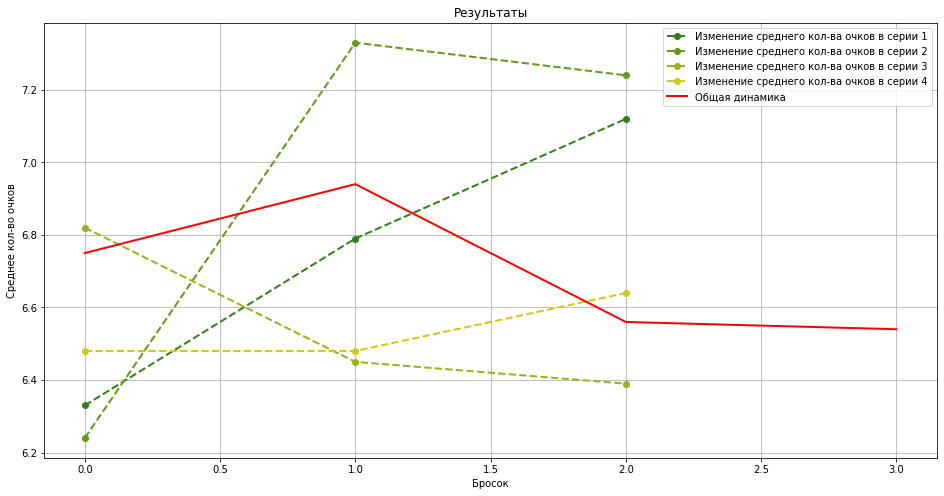

In [35]:
for i in range(len(sets_scores_data)):
    x=np.arange(3)
    y=sets_scores_data.iloc[i][:3]
    label=f'Изменение среднего кол-ва очков в серии {i+1}'
    color=['r' if sets_scores_data['mean'][len(sets_scores_data)-1]<sets_scores_data['mean'][0] else 'g'][0]
    
    plt.plot(x, y, label=label, ls='--', marker='o', color=(0.2+i*0.2, 0.5+0.1*i, 0.1), lw=2)
    plt.xlabel('Бросок')
    plt.ylabel('Среднее кол-во очков')
    plt.grid(True)
plt.plot(sets_scores_data['mean'], label='Общая динамика', lw=2, color=color)
plt.title('Результаты')
plt.legend()    
plt.show()